In [16]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv


In [17]:
# parameters
load_dotenv("./model.env")
sir_alpha = int(os.getenv("SIR_ALPHA"))
print('SIR_ALPHA: ', sir_alpha)
_model_L  = int(os.getenv("_MODEL_L"))
print('_MODEL_L: ', _model_L)
num_epochs = int(os.getenv("NUM_EPOCH"))
print('NUM_EPOCH: ', num_epochs)

save_folder = f'test_L{_model_L}_b4_sir{sir_alpha}'

# Load the JSON file
print(save_folder)
with open(f'./../data/{save_folder}/validation_results_sir{sir_alpha}_L{_model_L}_ep{num_epochs}.json', 'r') as f:
    validation_results = json.load(f)

# Extract the list of "graph_name" values
graph_names = [result['graph_name'] for result in validation_results]

# Print or use the extracted list
for i in range(len(graph_names)):
    print(f'{i}) {graph_names[i]}')


SIR_ALPHA:  2
_MODEL_L:  15
NUM_EPOCH:  150
test_L15_b4_sir2
0) ba_edgelist_exp1_3000_4
1) ba_edgelist_exp1_4000_4
2) ba_edgelist_exp1_5000_4
3) ba_edgelist_exp1_6000_4
4) ba_edgelist_exp1_7000_4
5) ba_edgelist_exp1_8000_4
6) ba_edgelist_exp2_2000_10
7) ba_edgelist_exp2_2000_20
8) ba_edgelist_exp2_2000_4
9) ba_edgelist_exp3_4000_10
10) ba_edgelist_exp3_4000_2
11) ba_edgelist_exp3_4000_6
12) CA-GrQc
13) email
14) facebook_combined
15) figeys
16) jazz
17) LastFM
18) Peh_edge
19) politician_edges
20) Stelzl
21) tvshow_edges
22) vidal
23) web-EPA


# SIR

In [18]:

# Load data from a single CSV
def load_sir_data(path):
    if path:
        data = pd.read_csv(path)
        return data['SIR']
    return None

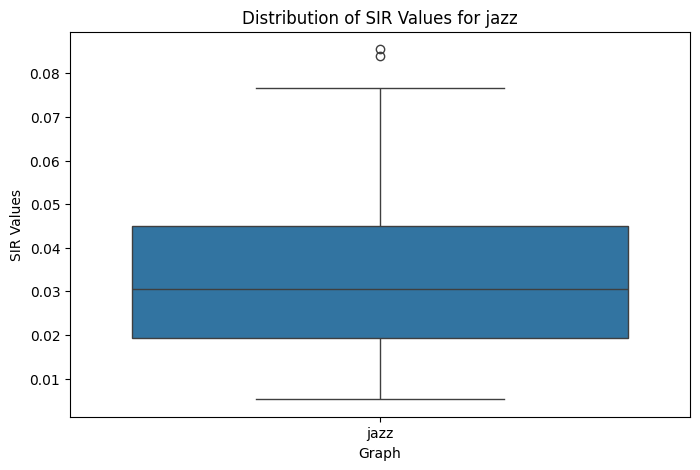

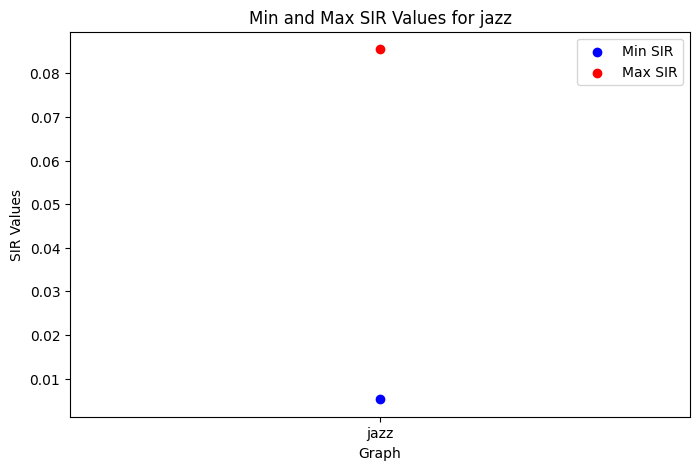

['ba_edgelist_1000_4', 'ba_edgelist_exp1_3000_4', 'ba_edgelist_exp1_4000_4', 'ba_edgelist_exp1_5000_4', 'ba_edgelist_exp1_6000_4', 'ba_edgelist_exp1_7000_4', 'ba_edgelist_exp1_8000_4', 'ba_edgelist_exp2_2000_10', 'ba_edgelist_exp2_2000_20', 'ba_edgelist_exp2_2000_4', 'ba_edgelist_exp3_4000_10', 'ba_edgelist_exp3_4000_2', 'ba_edgelist_exp3_4000_6', 'CA-GrQc', 'email', 'facebook_combined', 'figeys', 'jazz', 'LastFM', 'Peh_edge', 'politician_edges', 'Stelzl', 'tvshow_edges', 'vidal', 'web-EPA']


['./../../datasets/SIR_Results/ba_edgelist_1000_4\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp1_3000_4\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp1_4000_4\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp1_5000_4\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp1_6000_4\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp1_7000_4\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp1_8000_4\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp2_2000_10\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp2_2000_20\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp2_2000_4\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp3_4000_10\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp3_4000_2\\0.csv',
 './../../datasets/SIR_Results/ba_edgelist_exp3_4000_6\\0.csv',
 './../../datasets/SIR_Results/CA-GrQc\\0.csv',
 './../../datasets/SIR_Results/email\\0.csv',
 './../../datasets/SIR_Results/facebook_combined\\0.csv',
 './../../datasets

In [19]:
# Function to retrieve CSV paths (already provided)
def get_sir_paths(net_name, num_b=3, result_path='./../../datasets/SIR_Results/'):
    paths = []
    for i in range(num_b):
        sir_dir = os.path.join(result_path, net_name, f'{i}.csv')
        if os.path.exists(sir_dir):
            paths.append(sir_dir)
    return paths

def get_graph_all_paths(dataset_dir= "./../../datasets/"):
    graph_list = []
    for dirpath, _, files in os.walk(dataset_dir):
        for filename in files:
            try:
                if filename.endswith(".edges") :
                    if filename.startswith("ba_edgelist_exp") or not filename.startswith("ba_edgelist") or filename.startswith('ba_edgelist_1000_4'):
                        file_path = os.path.join(dirpath, filename) 
                        graph_list.append((file_path, os.path.splitext(filename)[0]))
            except Exception as e: 
                print(e, f'{filename}')
    return graph_list


# Plotting function for one graph
def plot_sir_distribution(net_name, sir_values):
    if sir_values is not None:
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=sir_values)
        plt.title(f'Distribution of SIR Values for {net_name}')
        plt.ylabel('SIR Values')
        plt.xlabel('Graph')
        plt.xticks([0], [net_name])
        plt.show()

        # Min-Max Line
        min_val, max_val = sir_values.min(), sir_values.max()
        plt.figure(figsize=(8, 5))
        plt.scatter([net_name], [min_val], label='Min SIR', color='blue')
        plt.scatter([net_name], [max_val], label='Max SIR', color='red')
        plt.title(f'Min and Max SIR Values for {net_name}')
        plt.ylabel('SIR Values')
        plt.xlabel('Graph')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for graph: {net_name}")

# Example usage
net_name = 'jazz'  # Replace with the actual network name
path = get_sir_paths(net_name, num_b=3)[0]
sir_values = load_sir_data(path)
plot_sir_distribution(net_name, sir_values)

all_graphs = get_graph_all_paths()
skip_graphs= ['p2p-Gnutella04','CA-HepTh', 'arenas-pgp', 'powergrid','NS', 'faa', 'ChicagoRegional', 'ia-crime-moreno', 'maybe-PROTEINS-full', 'sex']
all_graphs = [item for item in all_graphs if item[1] not in skip_graphs]
all_graphs_name = [grph[1] for grph in all_graphs]
print(all_graphs_name)
all_graphs_sir = [get_sir_paths( g_name)[0] for g_name in all_graphs_name]
all_graphs_sir

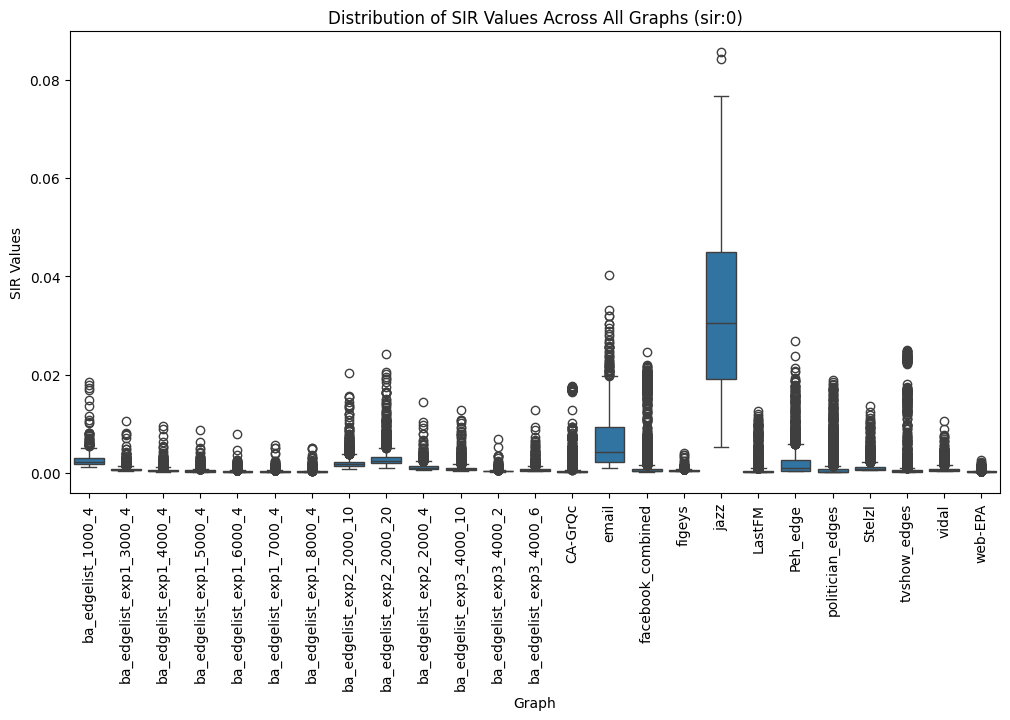

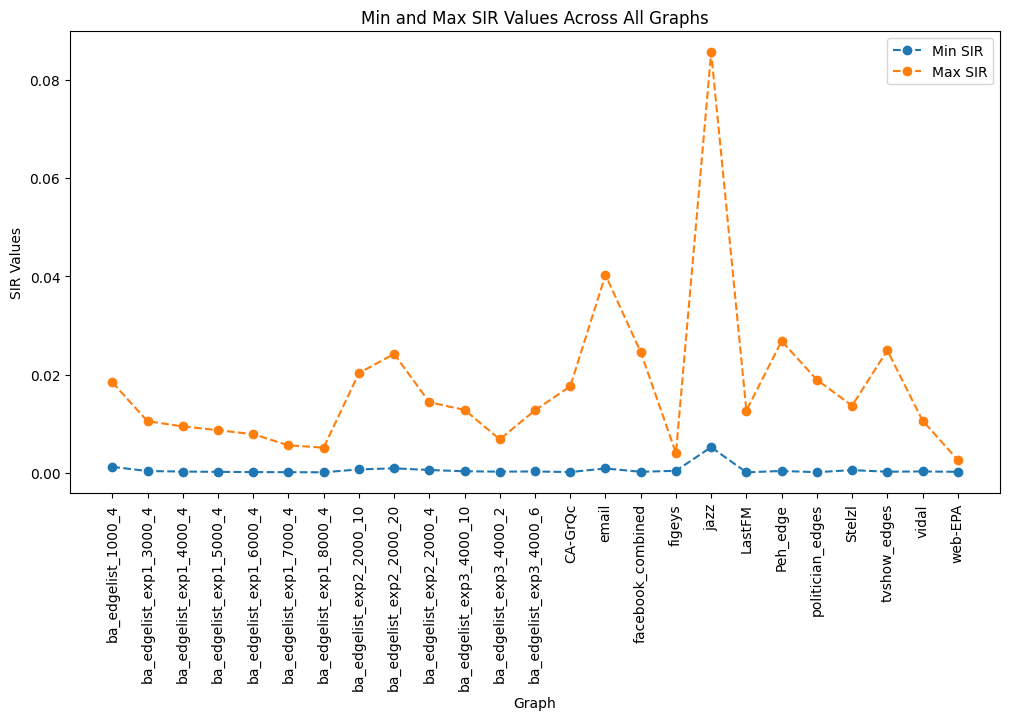

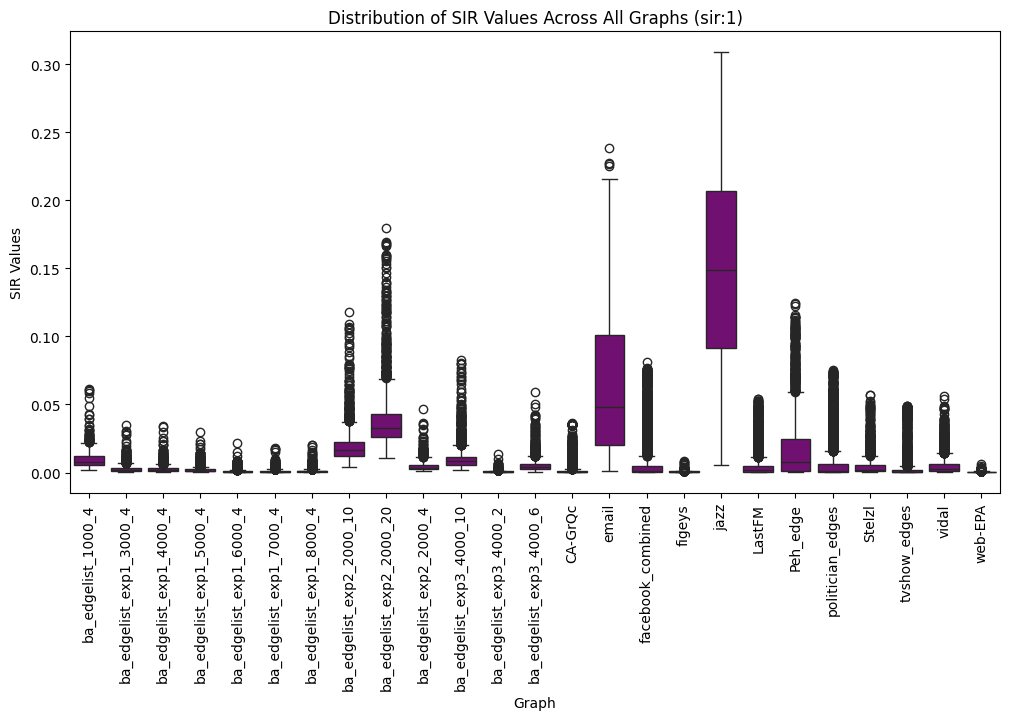

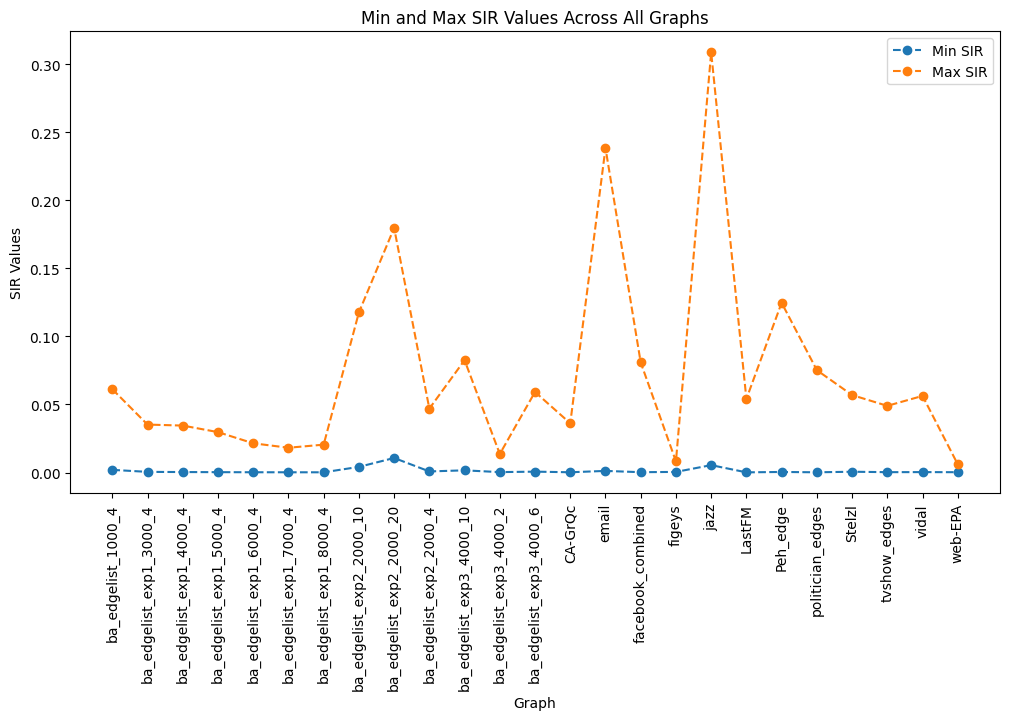

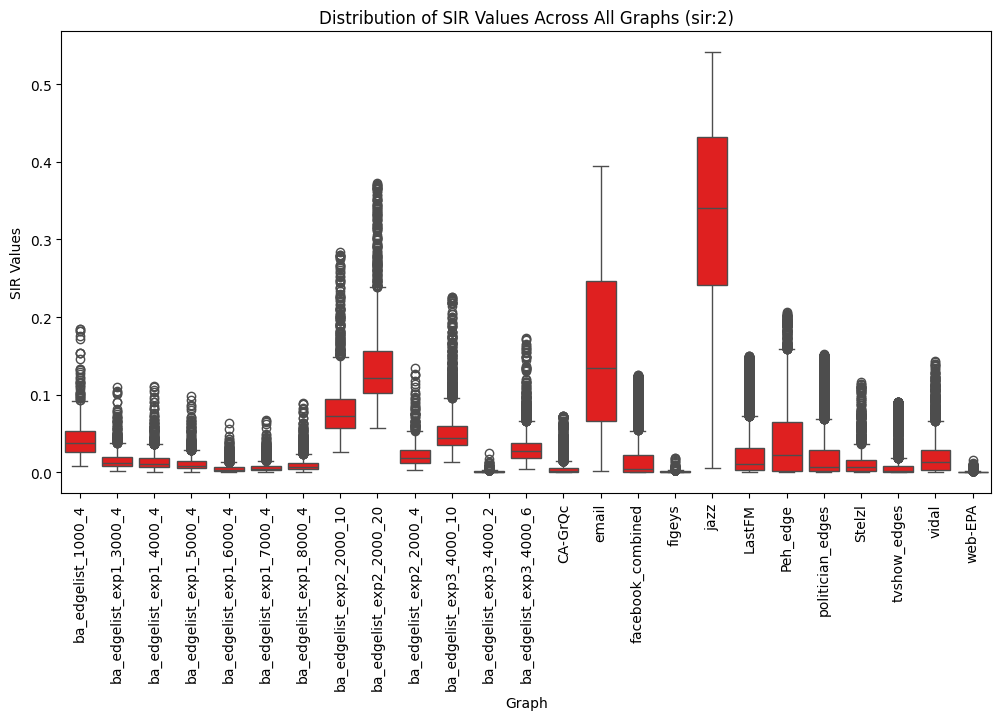

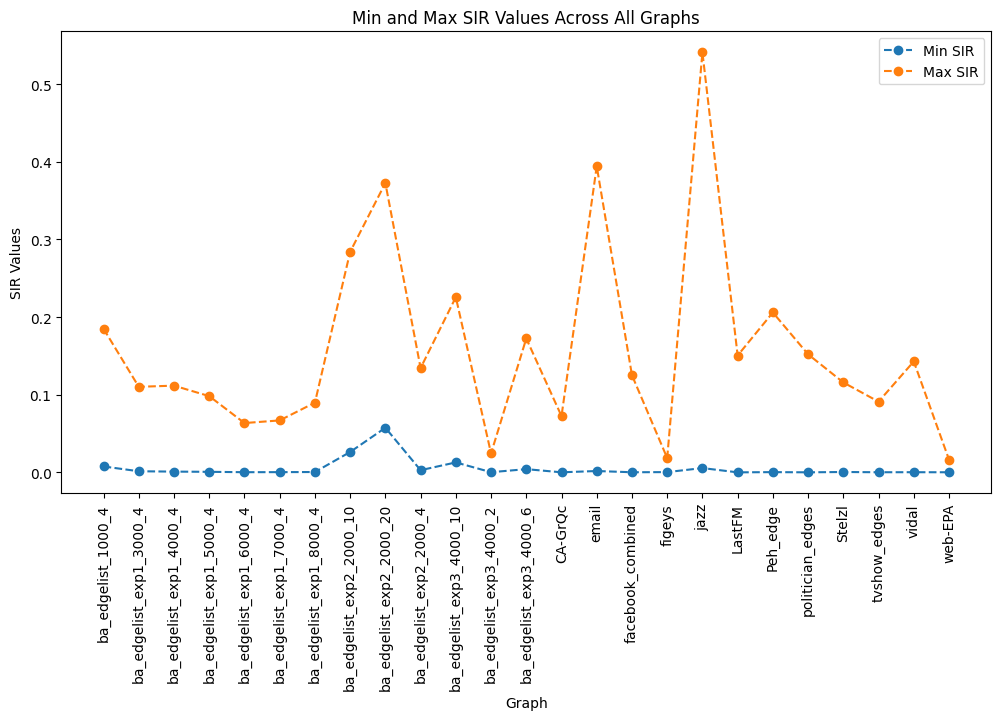

In [20]:

# Combined plotting function
def plot_all_graphs_distribution(graph_paths, sir_alpha=0):
    combined_data = []
    min_max_data = []

    for graph_path, graph_name in graph_paths:
        sir_path = get_sir_paths(graph_name, num_b=3)[sir_alpha]
        sir_values = load_sir_data(sir_path)
        if sir_values is not None:
            # Add data for box plot
            combined_data.extend([(graph_name, value) for value in sir_values])
            # Add data for min-max plot
            min_max_data.append({
                'Graph': graph_name,
                'Min': sir_values.min(),
                'Max': sir_values.max()
            })

    # Create DataFrame for box plot
    combined_df = pd.DataFrame(combined_data, columns=['Graph', 'SIR'])
    if sir_alpha == 0:
        color = None
    elif sir_alpha== 1:
        color = 'purple'
    else:
        color = 'red'
    # Box Plot for distributions
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Graph', y='SIR', data=combined_df, color=color)
    plt.title(f'Distribution of SIR Values Across All Graphs (sir:{sir_alpha})')
    plt.xticks(rotation=90)
    plt.ylabel('SIR Values')
    plt.xlabel('Graph')
    plt.show()

    # Create DataFrame for min-max plot
    min_max_df = pd.DataFrame(min_max_data)

    # Min-Max Plot
    plt.figure(figsize=(12, 6))
    plt.plot(min_max_df['Graph'], min_max_df['Min'], marker='o', label='Min SIR', linestyle='--')
    plt.plot(min_max_df['Graph'], min_max_df['Max'], marker='o', label='Max SIR', linestyle='--')
    plt.title('Min and Max SIR Values Across All Graphs')
    plt.xticks(rotation=90)
    plt.ylabel('SIR Values')
    plt.xlabel('Graph')
    plt.legend()
    plt.show()

plot_all_graphs_distribution(all_graphs, 0)
plot_all_graphs_distribution(all_graphs, 1)
plot_all_graphs_distribution(all_graphs, 2)


C:\Users\venus\AppData\Local\Temp\ipykernel_7000\931120973.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, idx].set_xticklabels(axes[0, idx].get_xticklabels(), rotation=90)
C:\Users\venus\AppData\Local\Temp\ipykernel_7000\931120973.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, idx].set_xticklabels(axes[0, idx].get_xticklabels(), rotation=90)
C:\Users\venus\AppData\Local\Temp\ipykernel_7000\931120973.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, idx].set_xticklabels(axes[0, idx].get_xticklabels(), rotation=90)


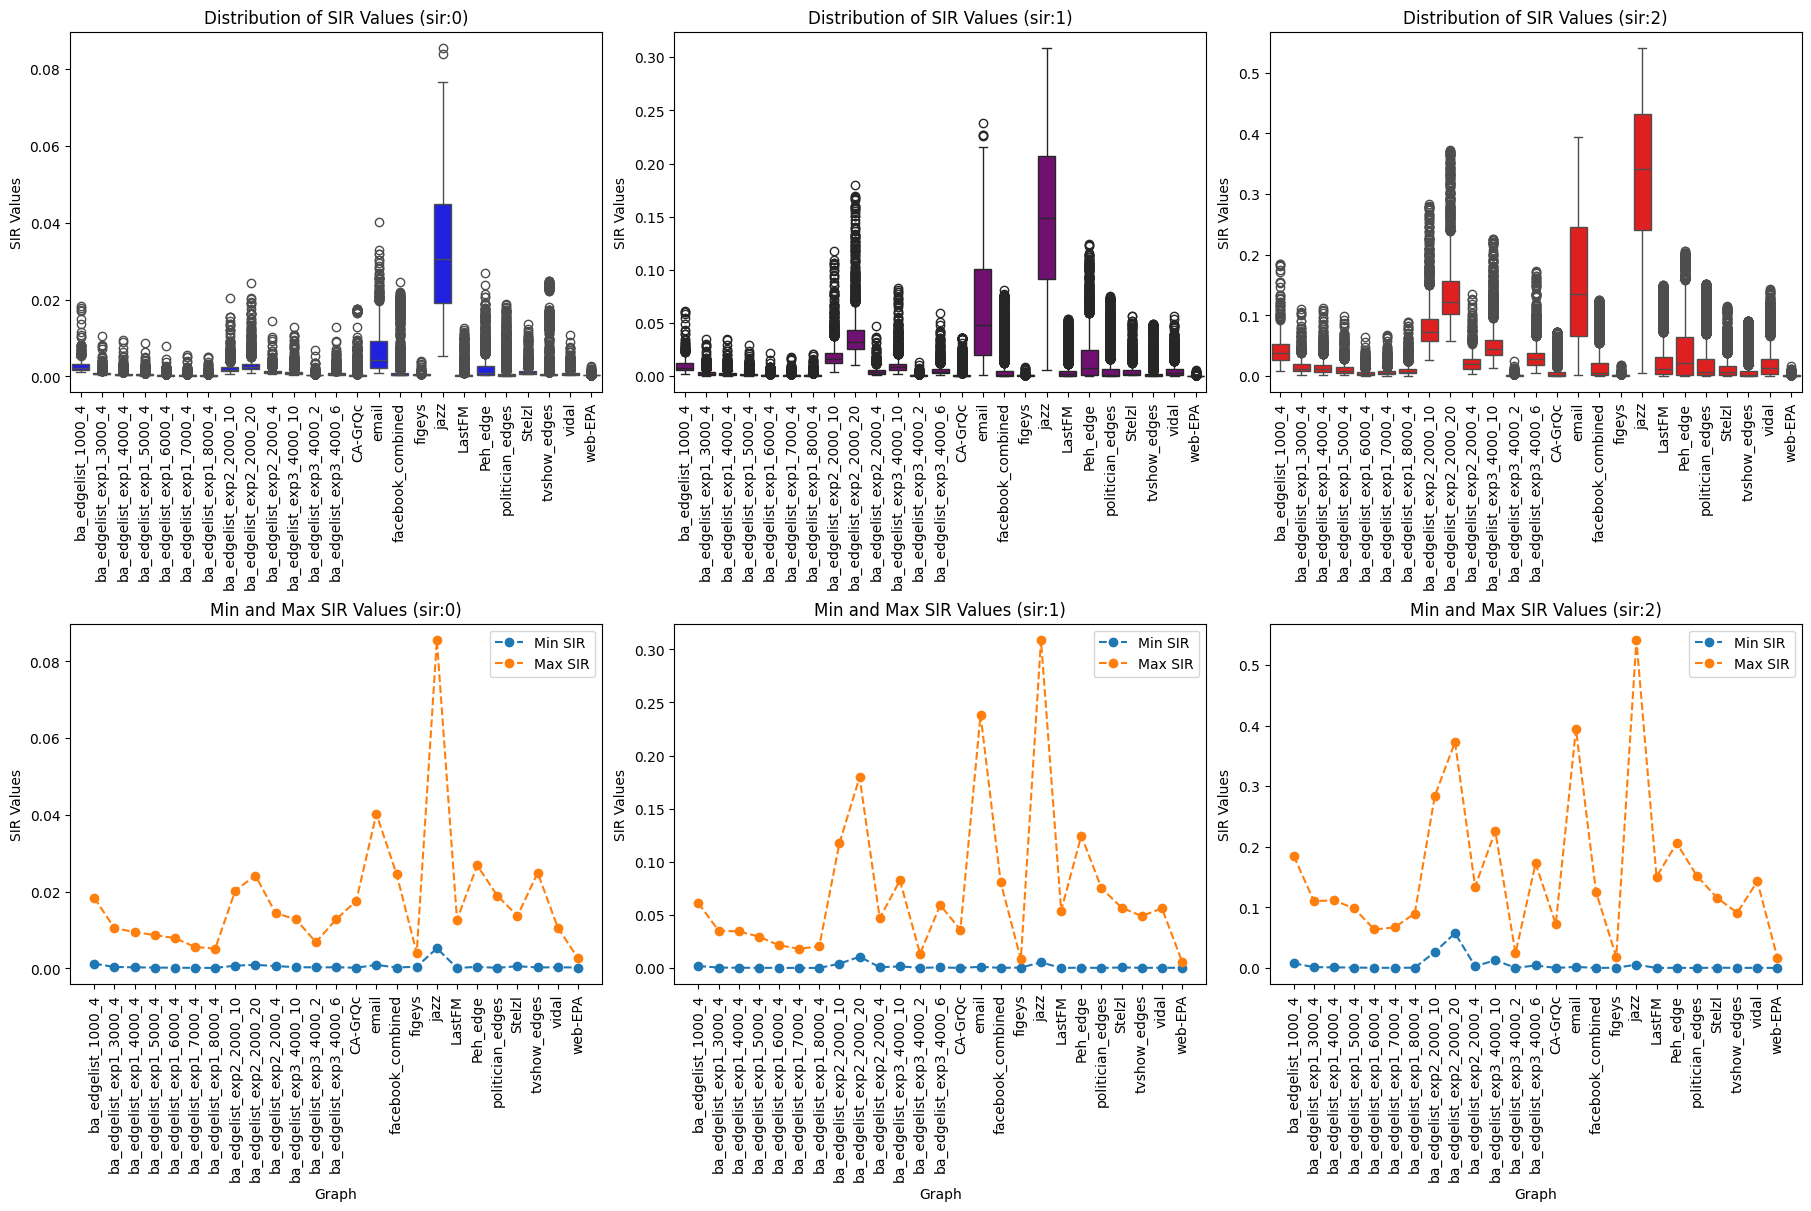

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combined plotting function with subplots
def plot_all_graphs_with_subplots(graph_paths, sir_alphas=(0, 1, 2)):
    fig, axes = plt.subplots(2, len(sir_alphas), figsize=(18, 12), constrained_layout=True)

    for idx, sir_alpha in enumerate(sir_alphas):
        combined_data = []
        min_max_data = []

        for graph_path, graph_name in graph_paths:
            sir_path = get_sir_paths(graph_name, num_b=3)[sir_alpha]
            sir_values = load_sir_data(sir_path)
            if sir_values is not None:
                # Add data for box plot
                combined_data.extend([(graph_name, value) for value in sir_values])
                # Add data for min-max plot
                min_max_data.append({
                    'Graph': graph_name,
                    'Min': sir_values.min(),
                    'Max': sir_values.max()
                })

        # Create DataFrame for box plot
        combined_df = pd.DataFrame(combined_data, columns=['Graph', 'SIR'])
        color = ['blue', 'purple', 'red'][sir_alpha]

        # Box Plot (Top row)
        sns.boxplot(ax=axes[0, idx], x='Graph', y='SIR', data=combined_df, color=color)
        axes[0, idx].set_title(f'Distribution of SIR Values (sir:{sir_alpha})')
        axes[0, idx].set_xticklabels(axes[0, idx].get_xticklabels(), rotation=90)
        axes[0, idx].set_xlabel('')
        axes[0, idx].set_ylabel('SIR Values')

        # Create DataFrame for min-max plot
        min_max_df = pd.DataFrame(min_max_data)

        # Min-Max Plot (Bottom row)
        axes[1, idx].plot(min_max_df['Graph'], min_max_df['Min'], marker='o', label='Min SIR', linestyle='--')
        axes[1, idx].plot(min_max_df['Graph'], min_max_df['Max'], marker='o', label='Max SIR', linestyle='--')
        axes[1, idx].set_title(f'Min and Max SIR Values (sir:{sir_alpha})')
        axes[1, idx].set_xticks(range(len(min_max_df['Graph'])))
        axes[1, idx].set_xticklabels(min_max_df['Graph'], rotation=90)
        axes[1, idx].set_xlabel('Graph')
        axes[1, idx].set_ylabel('SIR Values')
        axes[1, idx].legend()

    plt.show()

# Example usage
plot_all_graphs_with_subplots(all_graphs)


In [21]:
def get_norm_sir_paths(net_name, num_b=3, result_path='./../../datasets/SIR_Results/'):
    paths = []
    for i in range(num_b):
        sir_dir = os.path.join(result_path, net_name, f'{i}_normalized.csv')
        if os.path.exists(sir_dir):
            paths.append(sir_dir)
    return paths

# Load data from a single CSV
def load_norm_sir_data(path):
    if path:
        data = pd.read_csv(path)
        return data['Normalized_SIR']
    return None

load_norm_sir_data(get_norm_sir_paths('jazz')[0])

0      0.339911
1      0.046614
2      0.027231
3      0.096379
4      0.348095
         ...   
193    0.634042
194    0.531609
195    0.563324
196    0.536330
197    0.125254
Name: Normalized_SIR, Length: 198, dtype: float64

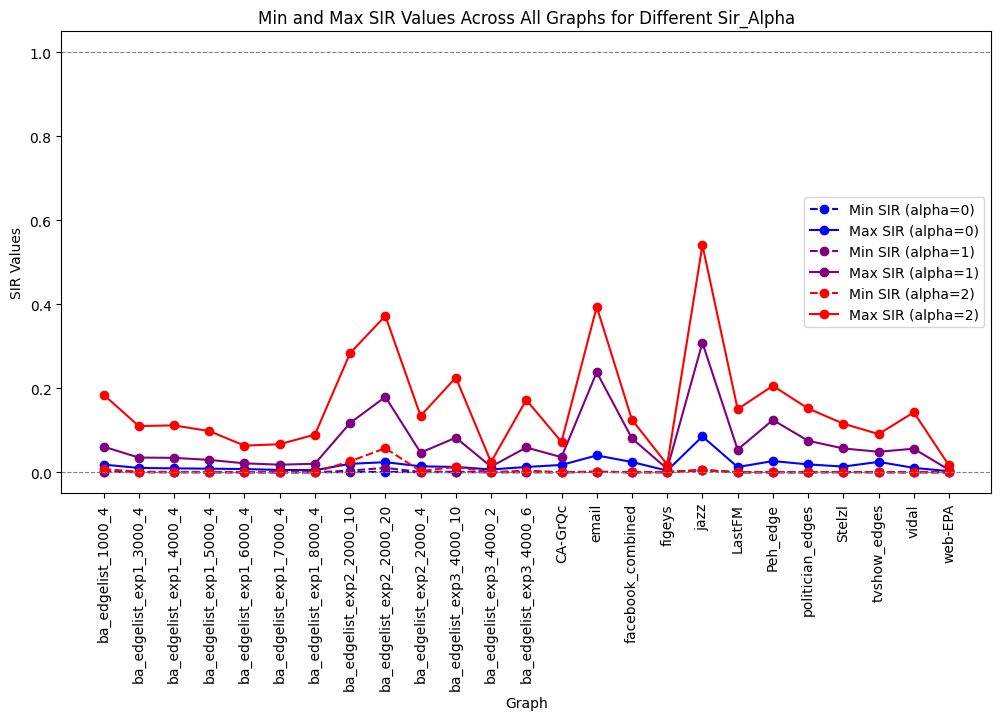

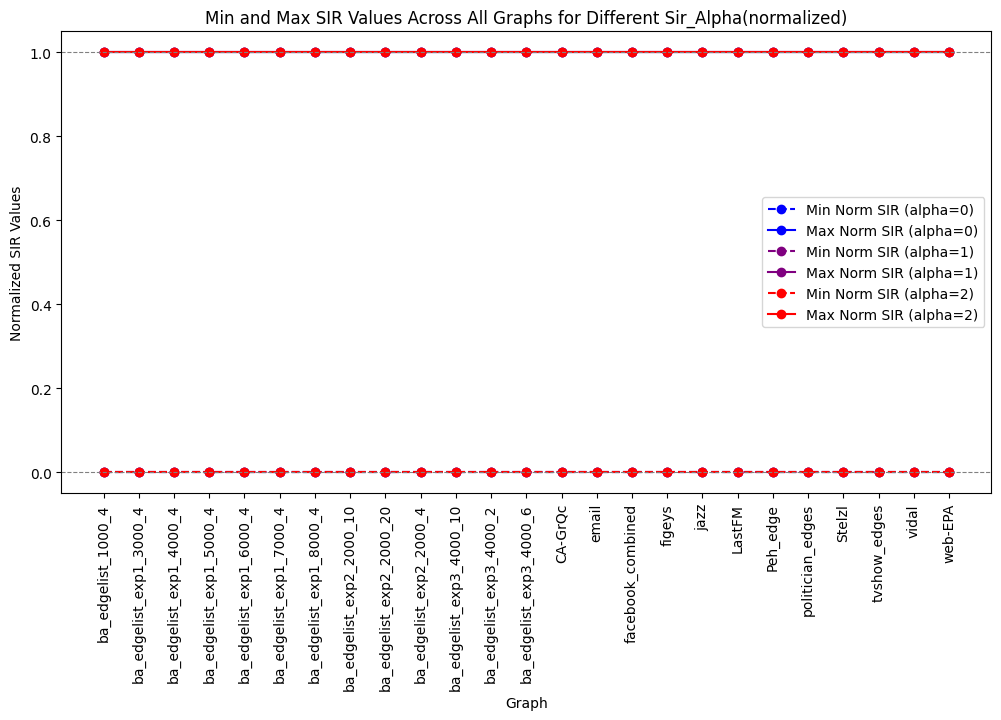

In [22]:

# Function to plot min and max SIR values for multiple sir_alpha with RGB colors
def plot_min_max_for_sir_alphas(graph_paths, sir_alphas=[0, 1, 2], colors=None):
    min_max_data = {alpha: [] for alpha in sir_alphas}

    for sir_alpha in sir_alphas:
        for graph_path, graph_name in graph_paths:
            sir_path = get_sir_paths(graph_name, num_b=3)
            if len(sir_path) > sir_alpha:  # Ensure the alpha index exists
                sir_values = load_sir_data(sir_path[sir_alpha])
                if sir_values is not None:
                    min_max_data[sir_alpha].append({
                        'Graph': graph_name,
                        'Min': sir_values.min(),
                        'Max': sir_values.max()
                    })

    # Plot all sir_alpha curves on the same figure
    plt.figure(figsize=(12, 6))

    for sir_alpha, data in min_max_data.items():
        if data:
            
            min_max_df = pd.DataFrame(data)
            plt.plot(
                min_max_df['Graph'], 
                min_max_df['Min'], 
                marker='o', 
                label=f'Min SIR (alpha={sir_alpha})', 
                linestyle='--', 
                color=colors[sir_alpha]
            )
            plt.plot(
                min_max_df['Graph'], 
                min_max_df['Max'], 
                marker='o', 
                label=f'Max SIR (alpha={sir_alpha})', 
                linestyle='-', 
                color=colors[sir_alpha]
            )
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
    plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.8)
    plt.title('Min and Max SIR Values Across All Graphs for Different Sir_Alpha')
    plt.xticks(rotation=90)
    plt.ylabel('SIR Values')
    plt.xlabel('Graph')
    plt.legend()
    plt.show()

def plot_min_max_for_norm_sir_alphas(graph_paths, sir_alphas=[0, 1, 2], colors=None):
    min_max_data = {alpha: [] for alpha in sir_alphas}

    for sir_alpha in sir_alphas:
        for graph_path, graph_name in graph_paths:
            norm_sir_path = get_norm_sir_paths(graph_name, num_b=3)
            if len(norm_sir_path) > sir_alpha:  # Ensure the alpha index exists
                norm_sir_values = load_norm_sir_data(norm_sir_path[sir_alpha])
                if norm_sir_values is not None:
                    min_max_data[sir_alpha].append({
                        'Graph': graph_name,
                        'Min': norm_sir_values.min(),
                        'Max': norm_sir_values.max()
                    })

    # Plot all sir_alpha curves on the same figure
    plt.figure(figsize=(12, 6))

    for sir_alpha, data in min_max_data.items():
        if data:
            
            min_max_df = pd.DataFrame(data)
            plt.plot(
                min_max_df['Graph'], 
                min_max_df['Min'], 
                marker='o', 
                label=f'Min Norm SIR (alpha={sir_alpha})', 
                linestyle='--', 
                color=colors[sir_alpha]
            )
            plt.plot(
                min_max_df['Graph'], 
                min_max_df['Max'], 
                marker='o', 
                label=f'Max Norm SIR (alpha={sir_alpha})', 
                linestyle='-', 
                color=colors[sir_alpha]
            )
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
    plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.8)
    plt.title('Min and Max SIR Values Across All Graphs for Different Sir_Alpha(normalized)')
    plt.xticks(rotation=90)
    plt.ylabel('Normalized SIR Values')
    plt.xlabel('Graph')
    plt.legend()
    plt.show()

# Example usage with RGB colors
rgb_colors = {
    0: 'blue',  # Red
    1: 'purple',  # Green
    2: 'red'   # Blue
}

plot_min_max_for_sir_alphas(all_graphs, sir_alphas=[0, 1, 2], colors=rgb_colors)
plot_min_max_for_norm_sir_alphas(all_graphs, sir_alphas=[0, 1, 2], colors=rgb_colors)


[('./../../datasets/BA\\ba_edgelist_1000_4.edges', 'ba_edgelist_1000_4'), ('./../../datasets/BA_EXP\\ba_edgelist_exp1_3000_4.edges', 'ba_edgelist_exp1_3000_4'), ('./../../datasets/BA_EXP\\ba_edgelist_exp1_4000_4.edges', 'ba_edgelist_exp1_4000_4'), ('./../../datasets/BA_EXP\\ba_edgelist_exp1_5000_4.edges', 'ba_edgelist_exp1_5000_4'), ('./../../datasets/BA_EXP\\ba_edgelist_exp1_6000_4.edges', 'ba_edgelist_exp1_6000_4'), ('./../../datasets/BA_EXP\\ba_edgelist_exp1_7000_4.edges', 'ba_edgelist_exp1_7000_4'), ('./../../datasets/BA_EXP\\ba_edgelist_exp1_8000_4.edges', 'ba_edgelist_exp1_8000_4'), ('./../../datasets/BA_EXP\\ba_edgelist_exp2_2000_10.edges', 'ba_edgelist_exp2_2000_10'), ('./../../datasets/BA_EXP\\ba_edgelist_exp2_2000_20.edges', 'ba_edgelist_exp2_2000_20'), ('./../../datasets/BA_EXP\\ba_edgelist_exp2_2000_4.edges', 'ba_edgelist_exp2_2000_4'), ('./../../datasets/BA_EXP\\ba_edgelist_exp3_4000_10.edges', 'ba_edgelist_exp3_4000_10'), ('./../../datasets/BA_EXP\\ba_edgelist_exp3_4000_2

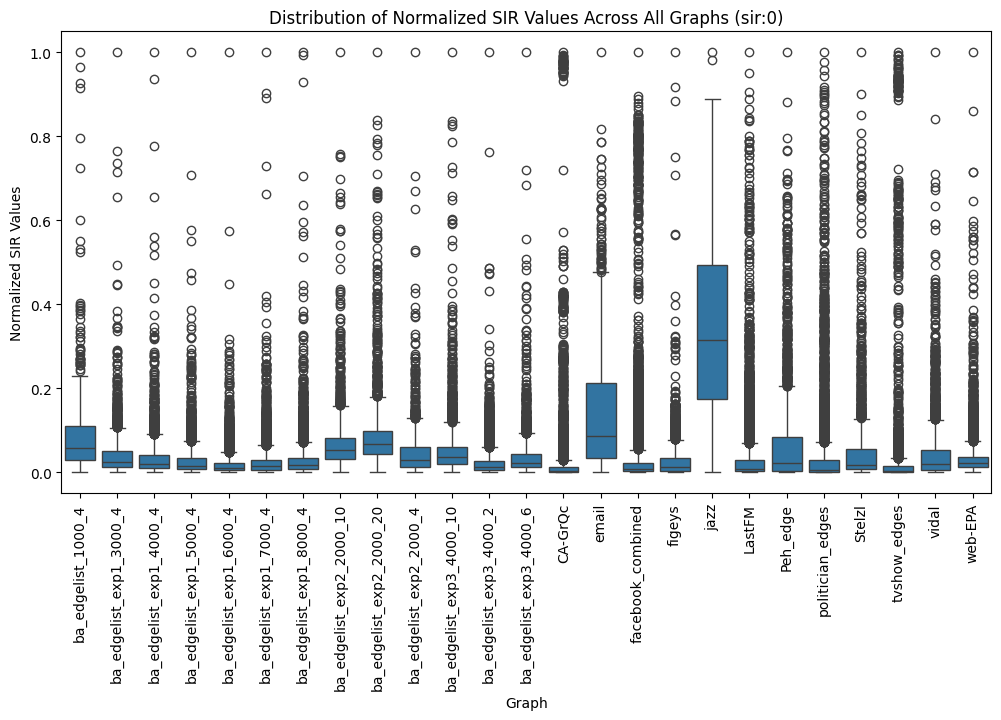

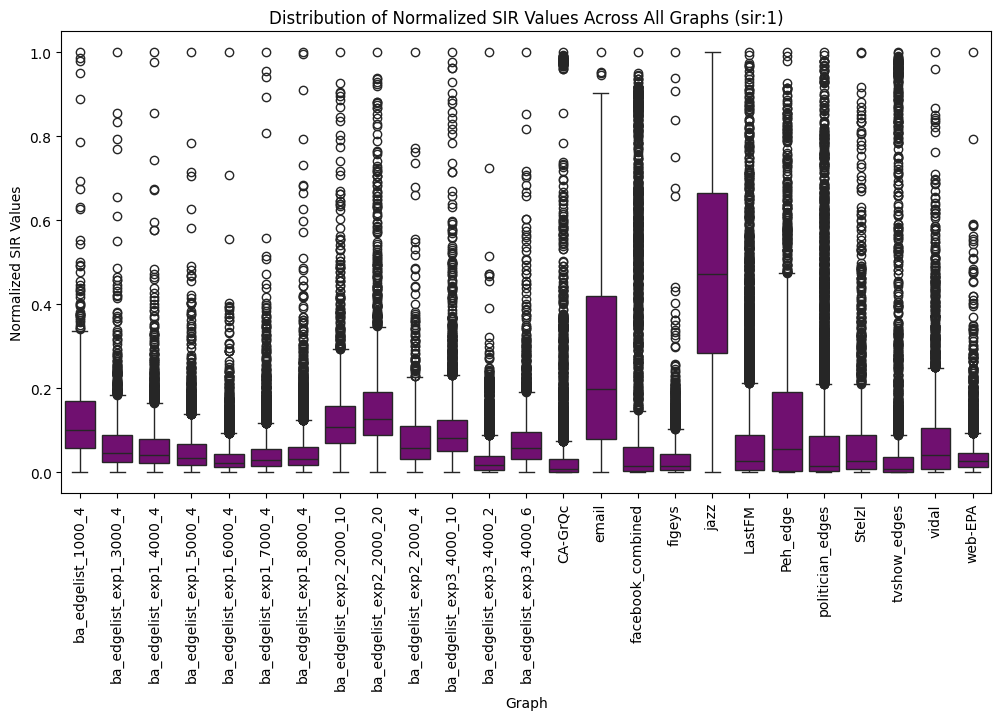

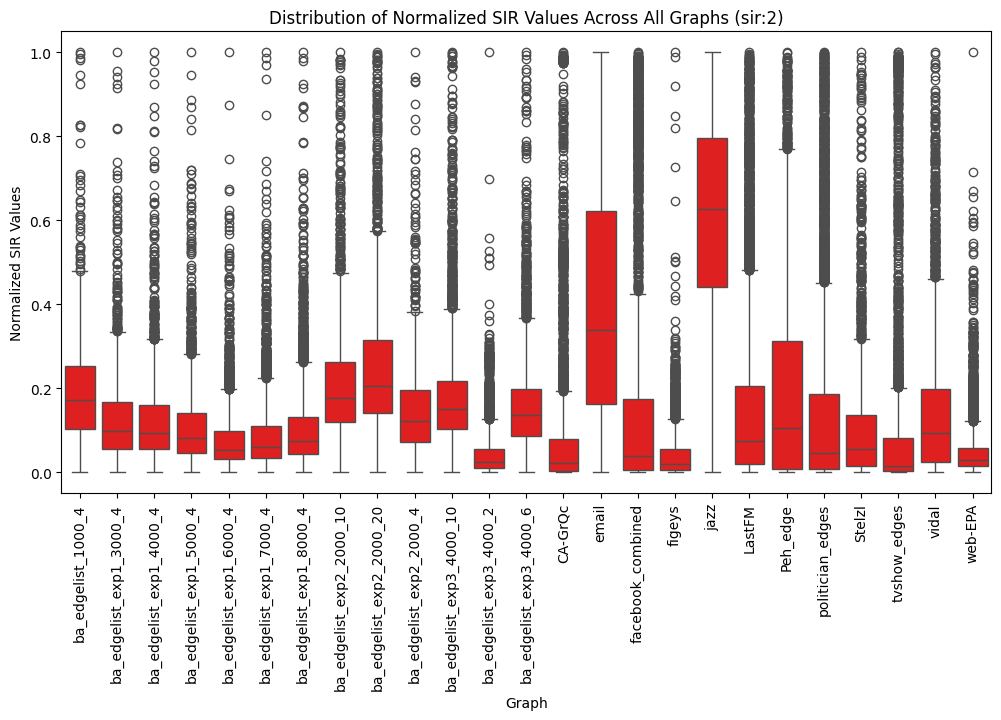

In [23]:
# Function to normalize data
def normalize_data(values):
    return (values - values.min()) / (values.max() - values.min())

# Combined plotting function for normalized data
def plot_normalized_distribution(graph_paths, sir_alpha=0):
    combined_data = []

    for graph_path, graph_name in graph_paths:
        sir_path = get_sir_paths(graph_name, num_b=3)[sir_alpha]
        sir_values = load_sir_data(sir_path)
        if sir_values is not None:
            # Normalize the data
            norm_sir_values = normalize_data(sir_values)
            # Add normalized data for box plot
            combined_data.extend([(graph_name, value) for value in norm_sir_values])

    # Create DataFrame for box plot
    combined_df = pd.DataFrame(combined_data, columns=['Graph', 'Normalized_SIR'])

    if sir_alpha == 0:
        color = None
    elif sir_alpha == 1:
        color = 'purple'
    else:
        color = 'red'

    # Box Plot for normalized distributions
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Graph', y='Normalized_SIR', data=combined_df, color=color)
    plt.title(f'Distribution of Normalized SIR Values Across All Graphs (sir:{sir_alpha})')
    plt.xticks(rotation=90)
    plt.ylabel('Normalized SIR Values')
    plt.xlabel('Graph')
    plt.show()

# Example usage
print(all_graphs)
plot_normalized_distribution(all_graphs, 0)
plot_normalized_distribution(all_graphs, 1)
plot_normalized_distribution(all_graphs, 2)


In [24]:
# Load and normalize data
def normalize_sir_in_file(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)
    
    if 'SIR' in data.columns:
        # Apply Min-Max Normalization
        sir_min = data['SIR'].min()
        sir_max = data['SIR'].max()
        data['Normalized_SIR'] = (data['SIR'] - sir_min) / (sir_max - sir_min)
        
        # Save the updated file with normalized column
        output_file_path = file_path.replace('.csv', '_normalized.csv')
        data.to_csv(output_file_path, index=False)
        print(f"Normalized data saved to {output_file_path}")
    else:
        print(f"'SIR' column not found in {file_path}")

# Normalize SIR values for all files in a graph dataset
def normalize_all_graphs_sir(graph_paths, sir_alpha=0):
    for graph_path, graph_name in graph_paths:
        sir_file = get_sir_paths(graph_name, num_b=3)[sir_alpha]
        if sir_file:
            normalize_sir_in_file(sir_file)
        else:
            print(f"No SIR file found for graph: {graph_name}")

normalize_all_graphs_sir(all_graphs, sir_alpha=0)
normalize_all_graphs_sir(all_graphs, sir_alpha=1)
normalize_all_graphs_sir(all_graphs, sir_alpha=2)


Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_1000_4\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp1_3000_4\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp1_4000_4\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp1_5000_4\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp1_6000_4\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp1_7000_4\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp1_8000_4\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp2_2000_10\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp2_2000_20\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results/ba_edgelist_exp2_2000_4\0_normalized.csv
Normalized data saved to ./../../datasets/SIR_Results

# MODEL


# Raw DATA

In [25]:
validation_results = None
print(os.getcwd())
with open(f'./../data/{save_folder}/validation_results_sir{sir_alpha}_L{_model_L}_ep{num_epochs}.json') as f:
    validation_results = json.load(f)
print(validation_results)

c:\Users\venus\Desktop\spreading influence identification\testing_cnn\models
[{'graph_name': 'ba_edgelist_exp1_3000_4', 'validation_loss': 0.001815610146149993, 'spearman_rank': 0.6809514393115552, 'kendall_tau': 0.5895721857179482, 'duration': 48.33471989631653}, {'graph_name': 'ba_edgelist_exp1_4000_4', 'validation_loss': 0.0017766101798479211, 'spearman_rank': 0.5624975663619964, 'kendall_tau': 0.5222227523024024, 'duration': 67.11829972267151}, {'graph_name': 'ba_edgelist_exp1_5000_4', 'validation_loss': 0.0017917216672678478, 'spearman_rank': 0.5698229529479854, 'kendall_tau': 0.5316923890904458, 'duration': 123.1690764427185}, {'graph_name': 'ba_edgelist_exp1_6000_4', 'validation_loss': 0.001808678224047071, 'spearman_rank': 0.5305816230449317, 'kendall_tau': 0.5048384150519275, 'duration': 165.71993017196655}, {'graph_name': 'ba_edgelist_exp1_7000_4', 'validation_loss': 0.0017771946603146326, 'spearman_rank': 0.36525584079186135, 'kendall_tau': 0.41386659863566055, 'duration': 2

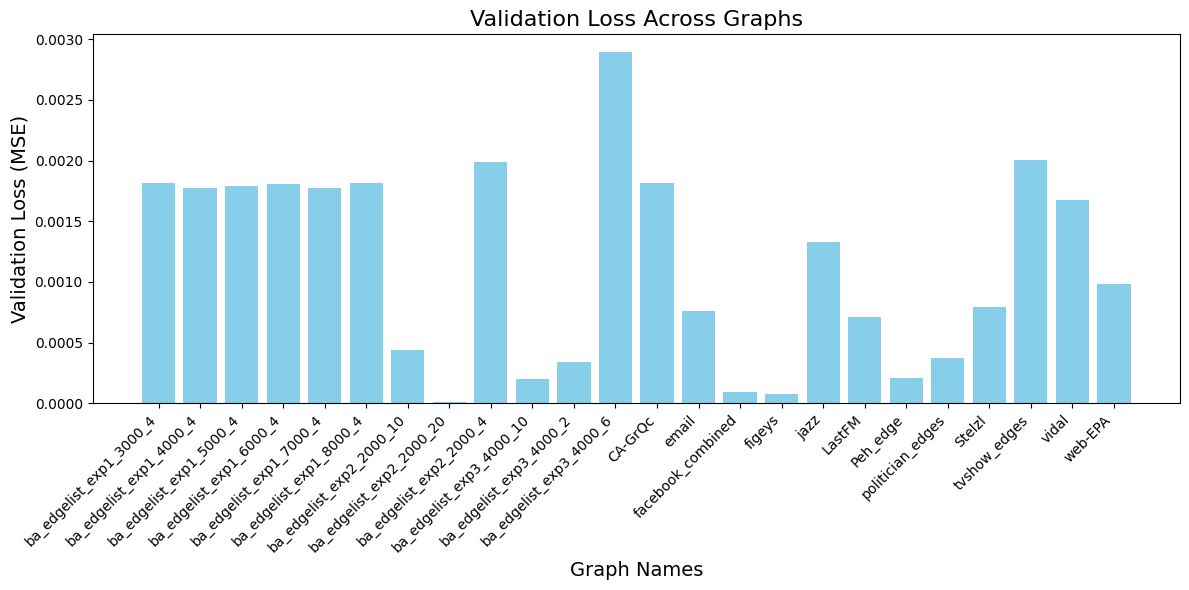

In [ ]:

# Extract validation loss and graph names
graph_names = [result['graph_name'] for result in validation_results]
validation_losses = [result['validation_loss'] for result in validation_results]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(graph_names, validation_losses, color='skyblue')
plt.xlabel("Graph Names", fontsize=14)
plt.ylabel("Validation Loss (MSE)", fontsize=14)
plt.title("Validation Loss Across Graphs", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./../img/validation_loss_across_graphs.png', dpi=300)
plt.show()

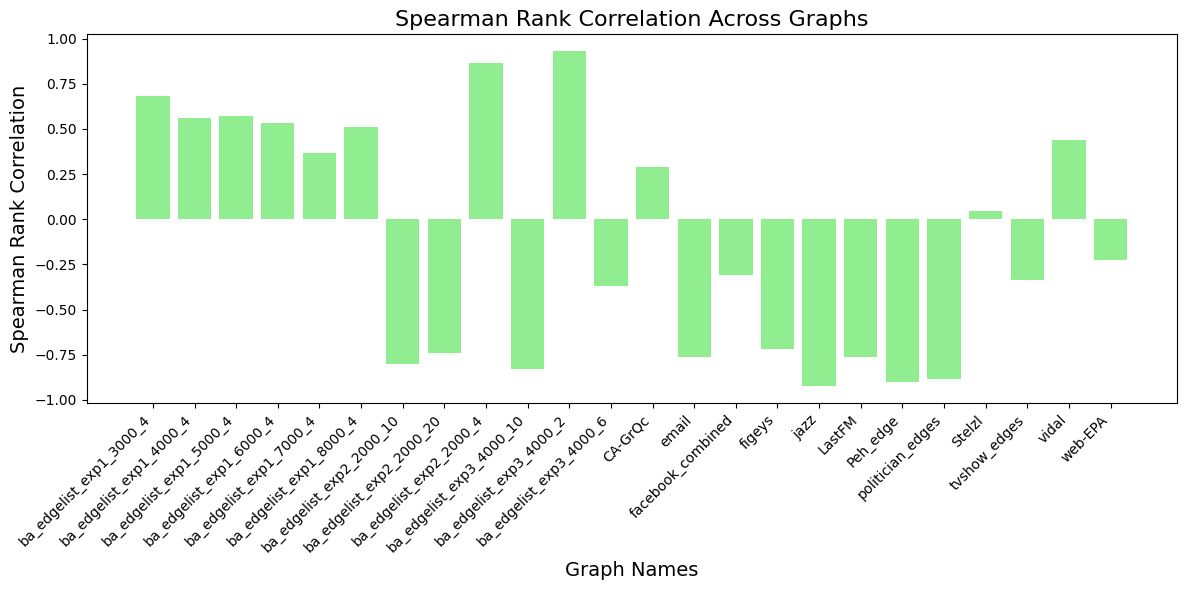

In [27]:
# Extract Spearman correlation values
spearman_ranks = [result['spearman_rank'] for result in validation_results]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(graph_names, spearman_ranks, color='lightgreen')
plt.xlabel("Graph Names", fontsize=14)
plt.ylabel("Spearman Rank Correlation", fontsize=14)
plt.title("Spearman Rank Correlation Across Graphs", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./../img/spearman_rank_across_graphs.png', dpi=300)
plt.show()


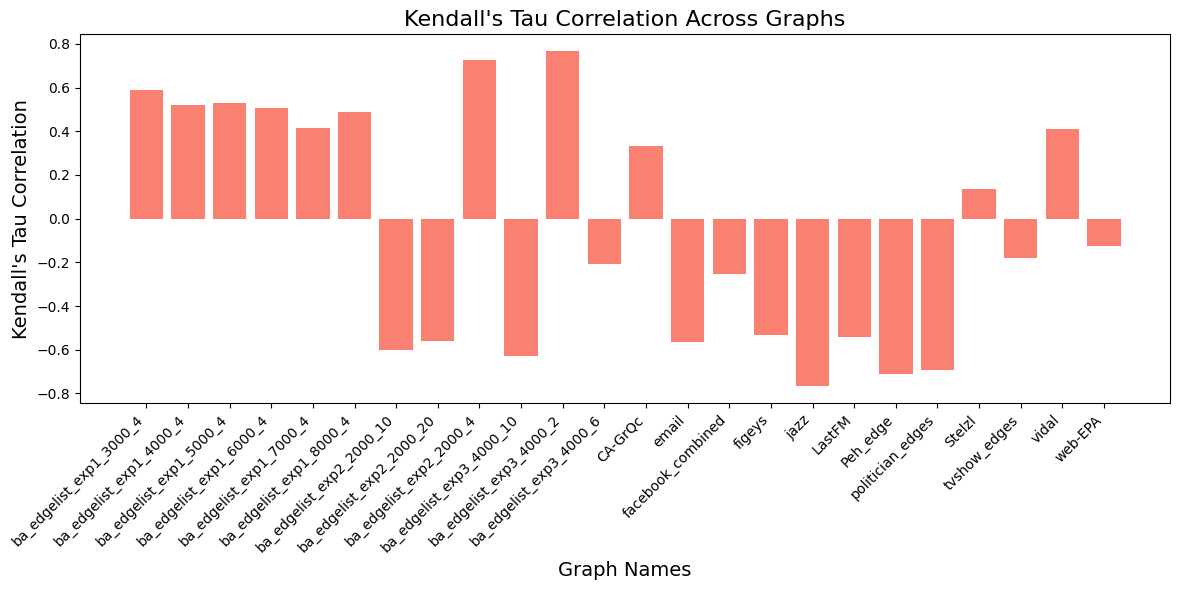

In [28]:
# Extract Kendall's Tau values
kendall_taus = [result['kendall_tau'] for result in validation_results]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(graph_names, kendall_taus, color='salmon')
plt.xlabel("Graph Names", fontsize=14)
plt.ylabel("Kendall's Tau Correlation", fontsize=14)
plt.title("Kendall's Tau Correlation Across Graphs", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./../img/kendalls_tau_across_graphs.png', dpi=300)
plt.show()


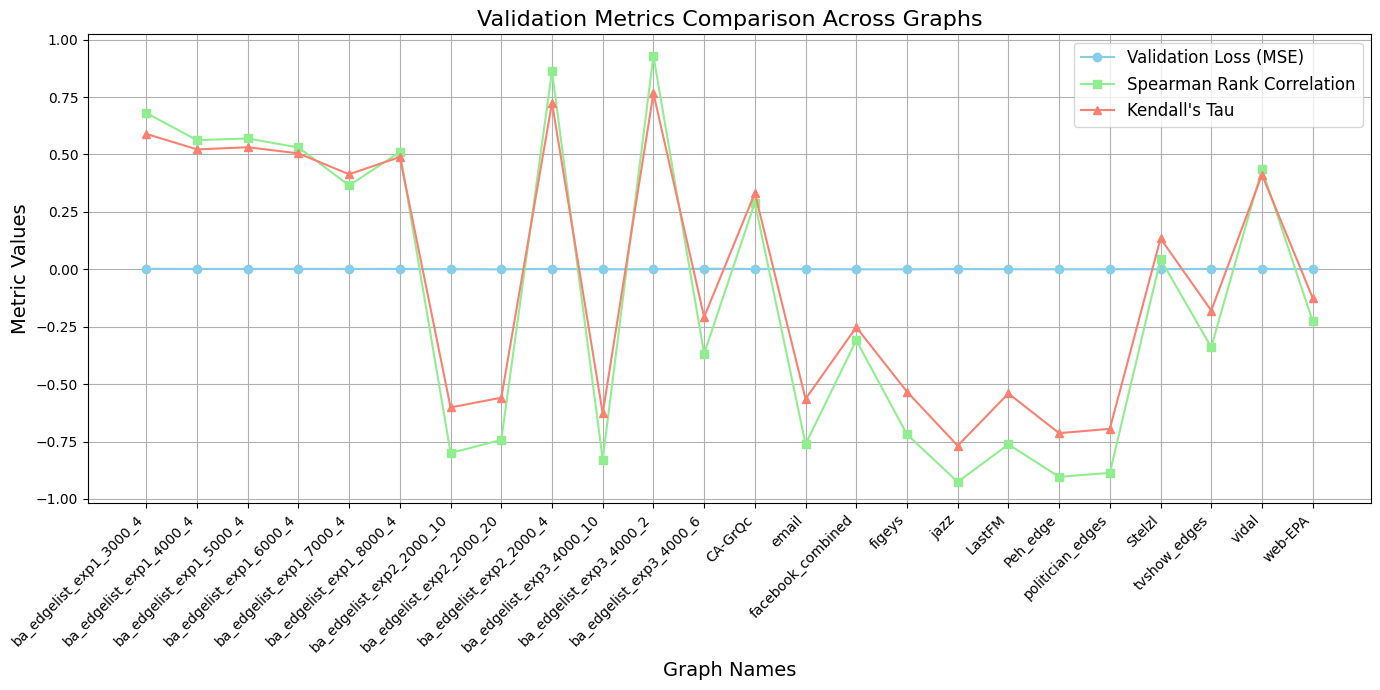

In [29]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(graph_names, validation_losses, label="Validation Loss (MSE)", marker='o', color='skyblue')
plt.plot(graph_names, spearman_ranks, label="Spearman Rank Correlation", marker='s', color='lightgreen')
plt.plot(graph_names, kendall_taus, label="Kendall's Tau", marker='^', color='salmon')

plt.xlabel("Graph Names", fontsize=14)
plt.ylabel("Metric Values", fontsize=14)
plt.title("Validation Metrics Comparison Across Graphs", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('./../img/metrics_comparison_across_graphs.png', dpi=300)
plt.show()


In [31]:
for result in validation_results:
    graph_name = result['graph_name']
    preds = result.get('predictions', [])
    labels = result.get('labels', [])

    if preds and labels:  # Only plot if data is available
        plt.figure(figsize=(8, 6))
        plt.scatter(labels, preds, alpha=0.7, color='purple')
        plt.plot([min(labels), max(labels)], [min(labels), max(labels)], color='red', linestyle='--', label='Ideal Fit')
        plt.xlabel("Ground Truth Labels (SIR)", fontsize=14)
        plt.ylabel("Predicted Labels (SIR)", fontsize=14)
        plt.title(f"Predictions vs Ground Truth for {graph_name}", fontsize=16)
        plt.legend(fontsize=12)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f'./testing_cnn/img/pred_vs_truth_{graph_name}.png', dpi=300)
        plt.show()


# Normalized DATA